In [14]:
import sys
sys.path.append('..')
from bast.tools import nanometers
from bast.matrices import matrix_s, multS
from bast.lattice import CartesianLattice
from bast.scattering import scattering_matrix
from bast.eigentricks import scattering_splitlr
from tqdm import tqdm
import numpy as np
from math import prod
from itertools import product
import scipy

pw=(2, 2)
nx, ny = pw[0] // 2, pw[1] // 2
a  = nanometers(100)
lattice = CartesianLattice(pw, a1=(a/2, 0.0), a2=(0.0, a/2), eps_emerg=1.0)
N = 50
M = 50
wavelengths = 1 / np.linspace(1./nanometers(10000), 1./nanometers(100), N)
kplanar = np.linspace(0.0, np.pi / a, M)

In [30]:
Ss = []
for wl, ky in tqdm(list(product(wavelengths, kplanar))):
    kp = (0, ky)
    U, Vi = lattice.U(wl, kp), lattice.Vi(wl, kp)
    Ve = lattice.Ve(wl, kp)
    S0, bf = scattering_matrix(pw, lattice, "rectangle", [0, 0, a,a], island_eps=13.0, eps_host=13.0, wavelength=wl, depth=0.5*a, slicing_pow=2, kp=kp)
    S1, bf = scattering_matrix(pw, lattice, "rectangle", [0, 0, a,a], island_eps=1.0, eps_host=1.0, wavelength=wl, depth=0.5*a, slicing_pow=2, kp=kp)
    S = multS(S0, S1)
    Ss.append((S, wl, ky))

100%|███████████████████████████████████████████| 2500/2500 [00:24<00:00, 100.68it/s]


In [91]:
points = []
for S, wl, ky in Ss:
    Sl, Sr = scattering_splitlr(S)
    w = scipy.linalg.eigvals(Sl, Sr)
    # On shell
    mask = np.logical_not(np.abs(np.abs(w) - 1.0) < 1e-10)
    w[mask] = np.nan
    points.append((np.angle(w), np.ones(len(w)) * ky * a, a * np.ones(len(w)) / wl))
points = np.asarray(points)
import pickle
pickle.dump(points, open("../data/bragg_diagram.pkl", "wb"))


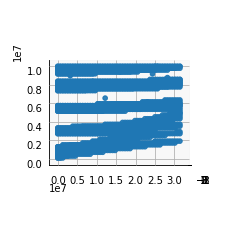

In [85]:
plt.plot(points[mask, 0], points[mask, 1], 'r.')


IndexError: boolean index did not match indexed array along dimension 1; dimension is 3 but corresponding boolean dimension is 16

In [81]:
mask.shape

(2500, 16)

In [ ]:
points[:,0]

(2500, 16)